In [1]:
import os
from sklearn.externals.joblib import Parallel, parallel_backend, register_parallel_backend

from ipyparallel import Client
from ipyparallel.joblib import IPythonParallelBackend
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"  
os.environ["CUDA_VISIBLE_DEVICES"] = ""
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from keras import backend as K
import ipyparallel as ipp
import os
print('CONFIGURING GPU USAGE USING TENSORFLOW')
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.9
config.gpu_options.allow_growth = True 

K.tensorflow_backend.set_session(tf.Session(config=config))
print('GPU INITIALIZED:',config.IsInitialized())
print('GPU CONFIGURATION:',config)
print('CONFIGURING CPU USAGE USING IPY-PARALLEL')
rc = ipp.Client()
ar = rc[:].apply_async(os.getpid)
pid_map = ar.get_dict()



with rc[:].sync_imports():
    from keras.applications import InceptionResNetV2
    import keras   
    import numpy as np 
    import pandas as pd 
    from keras.models import Sequential
    from keras import Sequential,activations,metrics
    from keras.preprocessing.image import load_img,img_to_array
    from keras.layers import Dense, Dropout,MaxPooling2D,GlobalAveragePooling2D,Conv2D,BatchNormalization,Flatten,Activation
    import matplotlib.pyplot as plt
    import glob 
    from keras.regularizers import l1,l2
    from keras.optimizers import SGD
    from subprocess import check_output
    from keras.callbacks import LearningRateScheduler
    from keras import optimizers
    from keras import backend as k
    from keras.models import Model
    import ipyparallel as ipp
    import cv2
with rc[:2].sync_imports():    
    import math
    import sklearn
    from sklearn.model_selection import train_test_split
    from sklearn.decomposition import PCA
    import glob
    from keras.utils import np_utils
    from sklearn.neural_network import MLPRegressor
    from sklearn.metrics import accuracy_score, confusion_matrix
      
    from sklearn.metrics import make_scorer
    

print('CPU ENGINES USED USED:{}'.format(pid_map))


print(ar.display_outputs())
rc.activate()
print(rc.activate())
print(rc.ids)
dview = rc[:]
dview.activate()
serial_result = list(map(lambda x:x**10, range(32)))
parallel_result = dview.map_sync(lambda x: x**10, range(32))
print('IS PARALLELIZED: ',serial_result == parallel_result)

rc.become_distributed()

GPU = config
CPU = ar

num_cores = 5

tf.GPUOptions()
if GPU:
    num_GPU = 1
    num_CPU = 5
if CPU:
    num_CPU = 5
    num_GPU = 1

config = tf.ConfigProto(intra_op_parallelism_threads=num_cores,\
        inter_op_parallelism_threads=num_cores, allow_soft_placement=True,\
        device_count = {'CPU' : num_CPU, 'GPU' : num_GPU})
session = tf.Session(config=config)
K.set_session(session)
print(config)
bview = rc.load_balanced_view()

# this is taken from the ipyparallel source code
register_parallel_backend('ipyparallel', lambda : IPythonParallelBackend(view=bview))
rc.become_distributed()



Using TensorFlow backend.


CONFIGURING GPU USAGE USING TENSORFLOW
GPU INITIALIZED: True
GPU CONFIGURATION: gpu_options {
  per_process_gpu_memory_fraction: 0.9
  allow_growth: true
}

CONFIGURING CPU USAGE USING IPY-PARALLEL
importing InceptionResNetV2 from keras.applications on engine(s)
importing keras on engine(s)
importing numpy on engine(s)
importing pandas on engine(s)
importing Sequential from keras.models on engine(s)
importing Sequential,activations,metrics from keras on engine(s)
importing load_img,img_to_array from keras.preprocessing.image on engine(s)
importing Dense,Dropout,MaxPooling2D,GlobalAveragePooling2D,Conv2D,BatchNormalization,Flatten,Activation from keras.layers on engine(s)
importing matplotlib.pyplot on engine(s)
importing glob on engine(s)
importing l1,l2 from keras.regularizers on engine(s)
importing SGD from keras.optimizers on engine(s)
importing check_output from subprocess on engine(s)
importing LearningRateScheduler from keras.callbacks on engine(s)
importing optimizers from keras

Client Scheduler: tcp://192.168.1.159:56563,Cluster Workers: 19 Cores: 19 Memory: 40.47 GB


## IMPORTING DATASETS / RESCALING DATA

[[[255. 255. 255.]
  [244. 244. 244.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [243. 243. 243.]
  [255. 255. 255.]]

 [[241. 241. 241.]
  [ 31.  31.  31.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [ 21.  21.  21.]
  [233. 233. 233.]]

 [[255. 255. 255.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [252. 252. 252.]]

 ...

 [[255. 255. 255.]
  [ 18.  18.  18.]
  [  0.   0.   0.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [253. 253. 253.]]

 [[229. 229. 229.]
  [ 32.  32.  32.]
  [  0.   0.   0.]
  ...
  [  3.   3.   3.]
  [ 17.  17.  17.]
  [229. 229. 229.]]

 [[255. 255. 255.]
  [240. 240. 240.]
  [255. 255. 255.]
  ...
  [248. 248. 248.]
  [241. 241. 241.]
  [255. 255. 255.]]]
(1, 767, 1022, 3)


(1, 767, 1022, 3, 256)

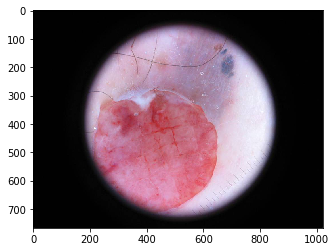

In [2]:
img = load_img('train/train/melanoma/ISIC_0000004.jpg')
plt.imshow(img)
x = img_to_array(img)
print(x)
x = x.reshape((1,) + x.shape)
print(x.shape)
y = keras.utils.to_categorical(x)
display(y.shape)

In [ ]:
print('<OPTIONIAL--BASIC EDGE DETECTOR USING OPEN-CV>')

# Read the image
# image = cv2.imread('340px-DNA_Structure+Key+Labelled.pn_NoBB.png')
image= cv2.imread('train/train/melanoma/ISIC_0000004.jpg')

# convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# blur it
blurred_image = cv2.GaussianBlur(gray_image, (7, 7), 0)

# Show both our images
cv2.imshow("Original image", image)
cv2.imshow("Blurred image", blurred_image) 

# Run the Canny edge detector
canny = cv2.Canny(blurred_image, 50, 8)
cv2.imshow("Canny", canny)



im, contours, hierarchy= cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print("Number of objects found = ", len(contours))
print('press "esc" to exit to properly exit out the image window ')


cv2.drawContours(image, contours, -1, (0,255,0), 200) #255,0,255... 255,255,255.... etc .  <(^^)>
cv2.imshow("objects Found", image)
cv2.waitKey()

In [3]:
batch_size = 64
pred_gen = keras.preprocessing.image.ImageDataGenerator(rescale= 1./255)
train_gen = keras.preprocessing.image.ImageDataGenerator(fill_mode='constant',zoom_range=.0075,
                                                         horizontal_flip=True,
                                                         vertical_flip=True,
                                                         rescale= 1./255)

valid_gen = keras.preprocessing.image.ImageDataGenerator(fill_mode='constant',
                                                         zoom_range=.0075,
                                                         horizontal_flip=True,
                                                         vertical_flip=True,
                                                         rescale= 1./255)

test_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

pred_generator = pred_gen.flow_from_directory('pred/pred',  
        target_size=(64,64),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='categorical')

train_generator = train_gen.flow_from_directory('train/train/', shuffle=True, 
        target_size=(64,64),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = valid_gen.flow_from_directory('valid/valid/',shuffle=True,
        target_size=(64,64),
        batch_size=batch_size,
        class_mode='categorical')

test_generator = test_gen.flow_from_directory('test/test/',shuffle=True,
        target_size=(64,64),
        batch_size=batch_size,
        class_mode='categorical')


Found 12 images belonging to 3 classes.
Found 2000 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [ ]:
with parallel_backend('ipyparallel'):
    i = 0
    for batch in train_gen.flow_from_directory('train/train/', batch_size=1,
                              save_to_dir='augmented_train/', save_prefix='cancer', save_format='jpg',):
        i += 1
        if i > 2000:
            break

In [ ]:
from keras.preprocessing import image
img_paths = glob.glob("train/train/melanoma/*.jpg")

def path_to_tensor(img_path):
    img = image.load_img(img_path, target_size=(64, 64))
    x = image.img_to_array(img)
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in img_paths]
    return np.vstack(list_of_tensors)

img_input = paths_to_tensor(img_paths)



print('image shape: #Classes->{}, Height->{}, Width->{}, #Channels->{}'\
      .format(img_input.shape[0],img_input.shape[1],img_input.shape[2],img_input.shape[3]))

In [ ]:
print(train_generator.classes[:600])

## GLOBAL AVERAGE POOLING
### BASELINE MODEL

In [4]:
from keras.models import load_model
model1 = load_model('GAP_model.h5')
model1.summary()

print('Gathering score for Global Average Pooling Neural Network')
with parallel_backend('ipyparallel'):
    scores1 = model1.evaluate_generator(test_generator,steps=600//64,workers=-1)
    print("%s: %.2f%%" % (model1.metrics_names[1], scores1[1]*100))

print('Gathering predictions for Global Average Pooling Neural Network')
with parallel_backend('ipyparallel'):    
    pred1=model1.predict_generator(test_generator,verbose=True,workers=-1,steps=600//64)
    pd.DataFrame(pred1.data.tolist())
    


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_5 ( (None, 3)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
Gathering score for Global Average Pooling Neural Network
acc: 76.91%
Gathering predictions for Global Average Pooling Neural Network
9/9 [==============================] - 223s 25s/step


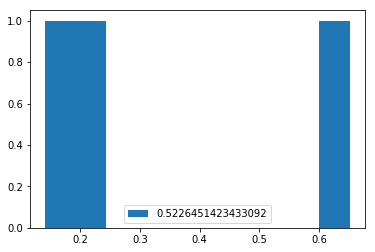

In [5]:
plt.hist(pred1[:-1][1])
plt.legend(scores1)

ACCURACY FOR SAMPLE 78: 0.62
PREDICTED CLASS FOR SAMPLE 78: CLASS 0


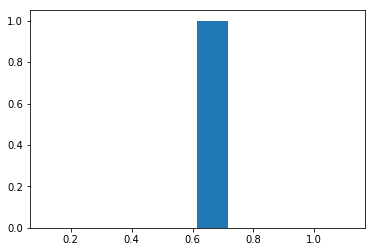

In [6]:
with parallel_backend('ipyparallel'):
    print('ACCURACY FOR SAMPLE 78: {:.2f}'.format(pred1[78][1]))
    plt.hist(pred1[78][1])
    print('PREDICTED CLASS FOR SAMPLE 78: CLASS {}'.format(test_generator.classes[78]))

ACCURACY FOR SAMPLE 500: 0.69
PREDICTED CLASS FOR SAMPLE 500: CLASS 1


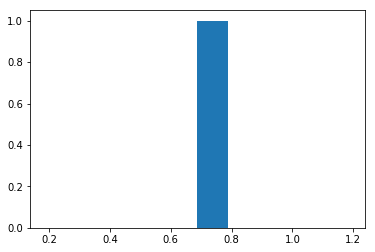

In [7]:
with parallel_backend('ipyparallel'):
    print('ACCURACY FOR SAMPLE 500: {:.2f}'.format(pred1[500][1]))
    plt.hist(pred1[500][1])
    print('PREDICTED CLASS FOR SAMPLE 500: CLASS {}'.format(test_generator.classes[500]))

# LOCALLY CONNECTED NETWORK
### FINAL MODEL

In [8]:
from keras.models import load_model
from keras.layers import LocallyConnected2D
model = load_model('Locally_connected_CNN.h5')
model.summary()
print('Gathering scores for Locally Connected Neural Network')
with parallel_backend('ipyparallel'):
    scores = model.evaluate_generator(test_generator,steps=600//64,workers=-1,use_multiprocessing=True)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

print('Gathering predictions for Locally Connected Neural Network')
with parallel_backend('ipyparallel'):
    pred=model.predict_generator(test_generator,verbose=True,workers=-1,steps=600//64,use_multiprocessing=True)
    pd.DataFrame(pred.data.tolist())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
dense_94 (Dense)             (None, 30, 30, 3)         195       
_________________________________________________________________
dense_95 (Dense)             (None, 30, 30, 3)         12        
_________________________________________________________________
dropout_28 (Dropout)         (None, 30, 30, 3)         0         
_________________________________________________________________
batch_normalization_50 (Batc (None, 30, 30, 3)         12        
_________________________________________________________________
locally_connected2d_24 (Loca (None, 30, 30, 20)        72000     
__________

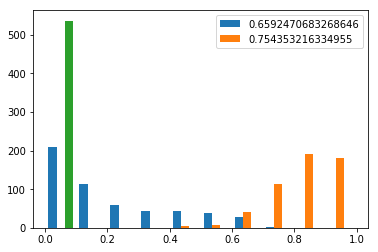

In [9]:

plt.hist(pred,orientation='vertical')
plt.legend(scores)

ACCURACY FOR SAMPLE 535: 0.95
PREDICTED CLASS FOR SAMPLE 535: CLASS 2


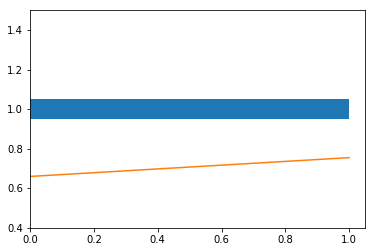

In [10]:
with parallel_backend('ipyparallel'):
    print('ACCURACY FOR SAMPLE 535: {:.2f}'.format(pred[535][1]))
    plt.hist(pred[535][1],orientation='horizontal')
    plt.plot(scores)
    print('PREDICTED CLASS FOR SAMPLE 535: CLASS {}'.format(test_generator.classes[535]))

ACCURACY FOR SAMPLE 535: 0.95
PREDICTED CLASS FOR SAMPLE 535: CLASS 1


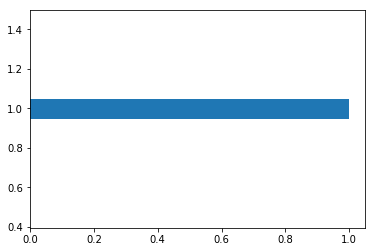

In [12]:
with parallel_backend('ipyparallel'):
    print('ACCURACY FOR SAMPLE 535: {:.2f}'.format(pred[137][1]))
    plt.hist(pred[137][1],orientation='horizontal')
    plt.plot(pred[137][1])
    print('PREDICTED CLASS FOR SAMPLE 535: CLASS {}'.format(test_generator.classes[137]))

In [13]:
from keras.applications.inception_v3 import preprocess_input

In [14]:
from keras.preprocessing.image import img_to_array,load_img
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
def pred(img_path):    
    img = load_img(img_path,target_size = (64,64)) 
    x = img_to_array(img) 
    x = np.expand_dims(x,axis=0) 
    x = preprocess_input(x)
    c = model.predict_classes(x)
    m = model.predict(x) 
    print(m)
    print(c)
    p = np.argmax(model.predict(x)) 
    acc = np.mean(p == x) *100
    plt.boxplot(m)
    plt.show()
    if p==0:    
        print("class: melanoma")
    if p==1:
        print("class: nevus")
        
    if p==2:
        print("class: seborrheic_keratosis")


[[7.6538146e-01 6.2804973e-01 2.6856782e-04]]
[0]


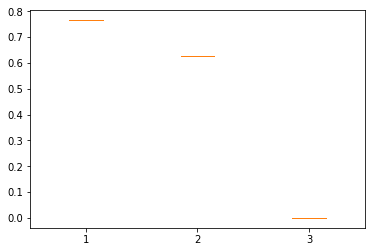

class: melanoma


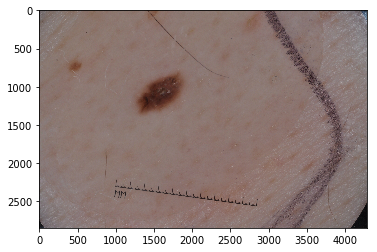

In [15]:
with parallel_backend('ipyparallel'):
    pred("test/test/melanoma/ISIC_0012425.jpg")
    z = plt.imread('test/test/melanoma/ISIC_0012425.jpg') 
    plt.imshow(z)
    

[[4.3794528e-02 9.9666107e-01 9.6319972e-08]]
[1]


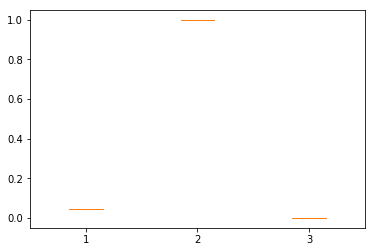

class: nevus


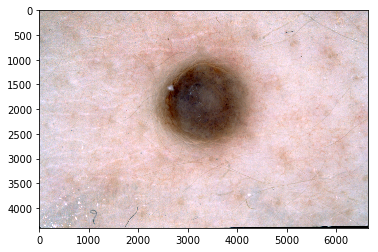

In [16]:
with parallel_backend('ipyparallel'):
    pred("test/test/nevus/ISIC_0014698.jpg")
    x = plt.imread('test/test/nevus/ISIC_0014698.jpg') 
    plt.imshow(x)

[[7.6538146e-01 6.2804973e-01 2.6856782e-04]]
[0]


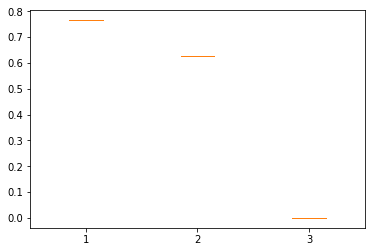

class: melanoma


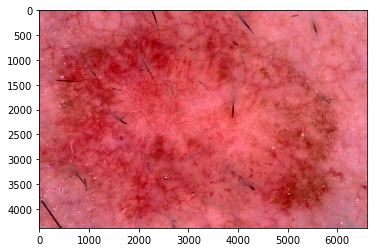

In [17]:
with parallel_backend('ipyparallel'):
    pred("test/test/melanoma/ISIC_0012425.jpg")
    y = plt.imread('test/test/melanoma/ISIC_0015050.jpg') 
    plt.imshow(y) 

[[5.01897275e-01 8.59408855e-01 1.00926345e-05]]
[1]


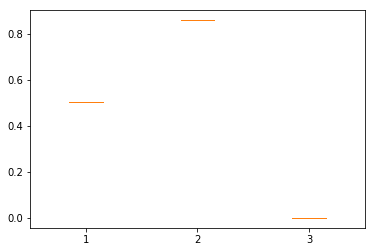

class: nevus


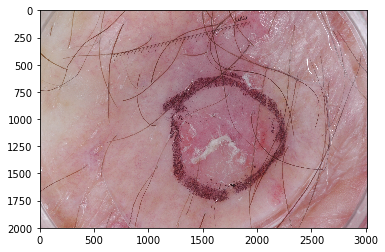

In [20]:
with parallel_backend('ipyparallel'):
    pred("pred/pred/seborrheic_keratosis/ISIC_0012387.jpg")
    y = plt.imread('pred/pred/seborrheic_keratosis/ISIC_0012387.jpg') 
    plt.imshow(y) 